<a href="https://colab.research.google.com/github/infinityrun/EIP-PHASE-1/blob/master/Prog-3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.activations import relu
from keras.models import Model
from keras.layers import Reshape,Input, Lambda

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

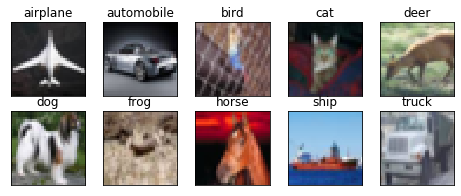

In [155]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [159]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [160]:
model.summary()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_66 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_67 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_177 (MaxPoolin (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_357 (Dropout)        (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 55s 140ms/step - loss: 1.8372 - acc: 0.3042 - val_loss: 1.3771 - val_acc: 0.4910
Epoch 2/50
390/390 [==============================] - 9s 22ms/step - loss: 1.3359 - acc: 0.5138 - val_loss: 1.1250 - val_acc: 0.5910
Epoch 3/50
390/390 [==============================] - 9s 22ms/step - loss: 1.1085 - acc: 0.6053 - val_loss: 0.9696 - val_acc: 0.6571
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9714 - acc: 0.6585 - val_loss: 0.8836 - val_acc: 0.6872
Epoch 5/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8689 - acc: 0.6998 - val_loss: 0.8243 - val_acc: 0.7140
Epoch 6/50
390/390 [==============================] - 9s 22ms/step - loss: 0.7921 - acc: 0.7267 - val_loss: 0.7817 - val_acc: 0.7279
Epoch 7/50
390/390 [==============================] - 9s 22ms/step - loss: 0.7483 - acc: 0.7432 - val_loss: 0.7132 - val_acc: 0.7528
Epoch 8/50
390/390 [==============================] - 9s 22ms/step 

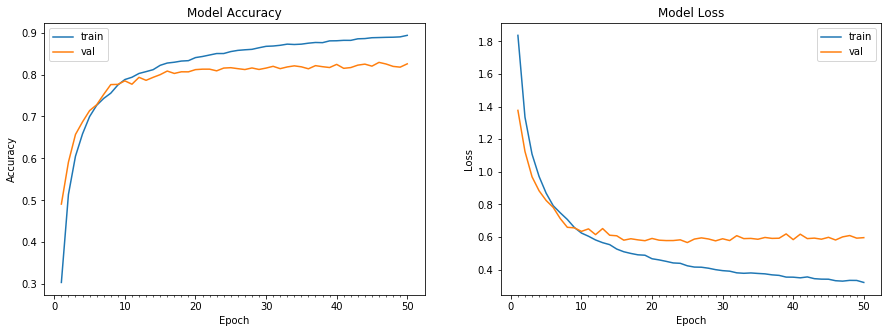

Accuracy on test data is: 82.56


In [161]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [203]:
model = Sequential()
model.add(SeparableConv2D(32, 3, 3, activation='relu', input_shape=(32, 32, 3))) # (30, 3)
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(SeparableConv2D(64, kernel_size = (3, 3), strides=(2, 2), activation='relu')) # (14, 5)
model.add(BatchNormalization())
model.add(Dropout(0.13))


model.add(SeparableConv2D(96, 3, 3, activation='relu')) # (12, 7)
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(SeparableConv2D(96, 3, 3, activation='relu')) # (10, 11)
model.add(BatchNormalization())
model.add(Dropout(0.18))

model.add(SeparableConv2D(192, kernel_size = (3, 3), strides=(2, 2), activation='relu')) # (4, 19)
model.add(BatchNormalization())
model.add(Dropout(0.20))

#model.add(SeparableConv2D(192, 3, 3, activation='relu')) # (8, 15)
#model.add(BatchNormalization())
#model.add(Dropout(0.20))


model.add(SeparableConv2D(192, 3, 3, activation='relu')) # (2, 23)
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(SeparableConv2D(num_classes, 2, 2, activation='relu')) # (1, 23)

model.add(Flatten())
model.add(Activation('softmax')) #(1, 23)

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `Separable

Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_912 (Separa (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_442 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_578 (Dropout)        (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_913 (Separa (None, 14, 14, 64)        2400      
_________________________________________________________________
batch_normalization_443 (Bat (None, 14, 14, 64)        256       
_________________________________________________________________
dropout_579 (Dropout)        (None, 14, 14, 64)        0         
_________________________________________________________________
separable_conv2d_914 (Separa (None, 12, 12, 96)     

**EXTREME OVERFITTED MODEL**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50
390/390 [==============================] - 43s 111ms/step - loss: 1.6186 - acc: 0.4225 - val_loss: 1.3735 - val_acc: 0.5201
Epoch 2/50
390/390 [==============================] - 15s 38ms/step - loss: 1.2581 - acc: 0.5574 - val_loss: 1.1275 - val_acc: 0.6068
Epoch 3/50
390/390 [==============================] - 15s 38ms/step - loss: 1.1356 - acc: 0.6011 - val_loss: 1.0811 - val_acc: 0.6229
Epoch 4/50
390/390 [==============================] - 15s 38ms/step - loss: 1.0472 - acc: 0.6320 - val_loss: 0.9864 - val_acc: 0.6523
Epoch 5/50
390/390 [==============================] - 15s 38ms/step - loss: 0.9799 - acc: 0.6572 - val_loss: 1.0075 - val_acc: 0.6528
Epoch 6/50
390/390 [==============================] - 15s 37ms/step - loss: 0.9317 - acc: 0.6727 - val_loss: 0.8840 - val_acc: 0.6926
Epoch 7/50
390/390 [==============================] - 15s 37ms/step - loss: 0.8871 - acc: 0.6910 - val_loss: 0.8874 - val_acc: 0.6874
Epoch 8/50
390/390 [==============================] - 15s 38m

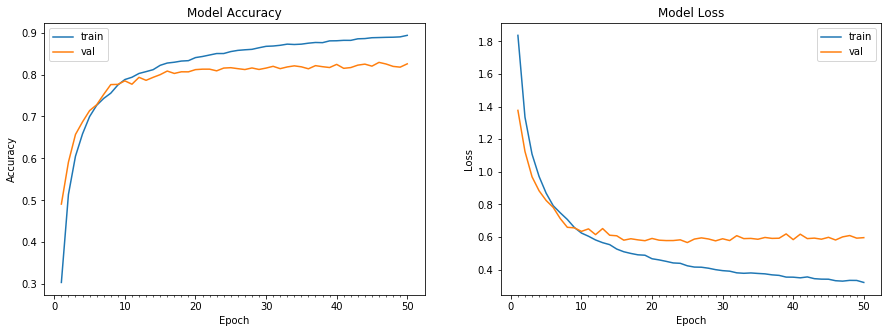

Accuracy on test data is: 77.44


In [204]:
start = time.time()
# Train the model
my_model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50,
                                  validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("My model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))